In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_twelve_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >='2016-08-23').\
group_by(Measurement.date).all()

prcp_twelve_months_df = pd.DataFrame(prcp_twelve_months, columns=['Date', 'Precipitation'])
prcp_twelve_months_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


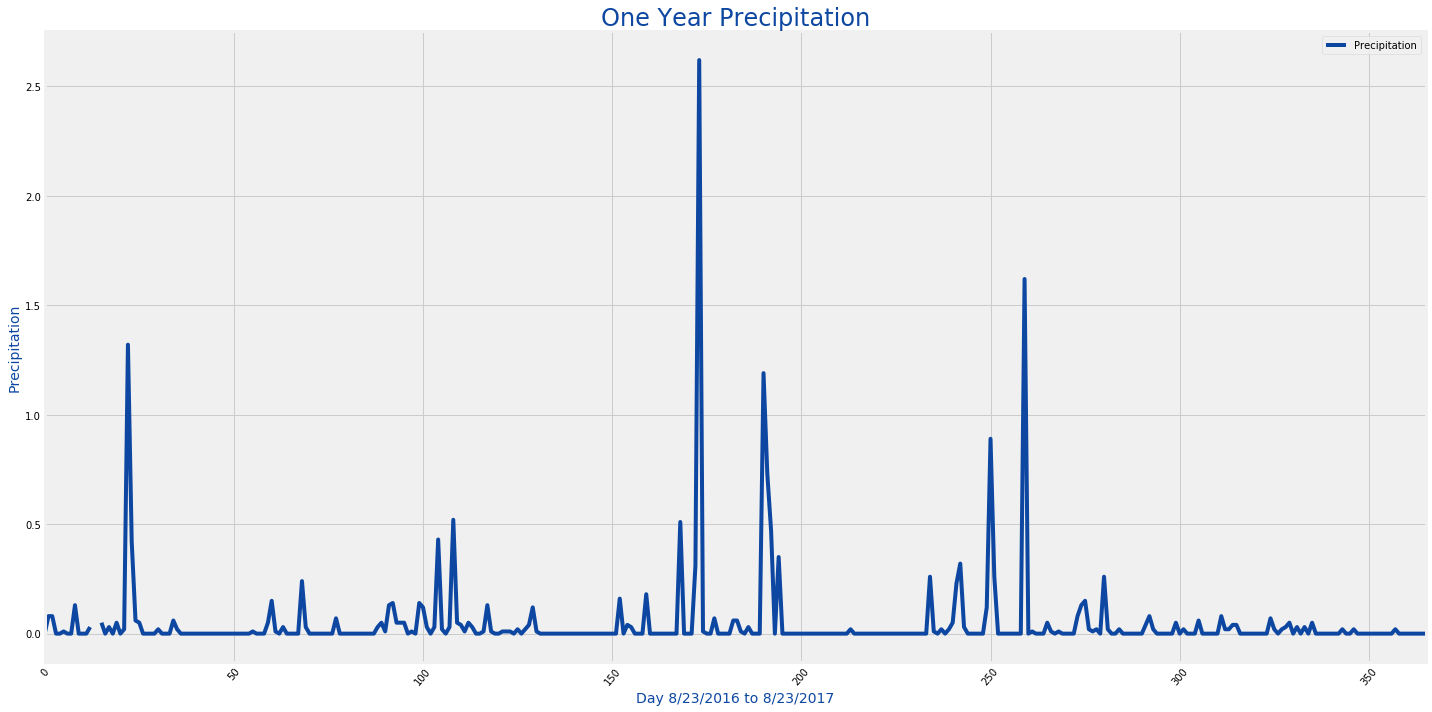

In [11]:
#Plot the results from the query above
prcp_twelve_months_df.plot(rot=50, figsize = (20, 10), color = "#0D47A1")
plt.title("One Year Precipitation", size =24, color="#0D47A1")
plt.xlabel("Day 8/23/2016 to 8/23/2017",size =14, color="#0D47A1")
plt.ylabel("Precipitation",size =14, color="#0D47A1")
plt.tight_layout()

#Set values for x-axis
plt.tight_layout()
plt.savefig("yr_precipitation.png")
plt.show()

In [12]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date: ", one_year_ago)

Date:  2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp)

In [14]:
#Save the query results as a Pandas DataFrame and set the index to the date column
prcp_scores_df = pd.DataFrame(prcp_scores, columns=['Date', 'Precipitation'])
prcp_scores_df.set_index("Date").head(10)

,Precipitation
Date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN
2010-01-07,0.06
2010-01-08,0.00
2010-01-09,0.00
2010-01-10,0.00


In [15]:
# Sort the dataframe by date
prcp_scores_df.set_index("Date").sort_values(by=["Date"]).head(10)

,Precipitation
Date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05
2010-01-01,0.14
2010-01-01,0.28
2010-01-02,0.00
2010-01-02,0.00


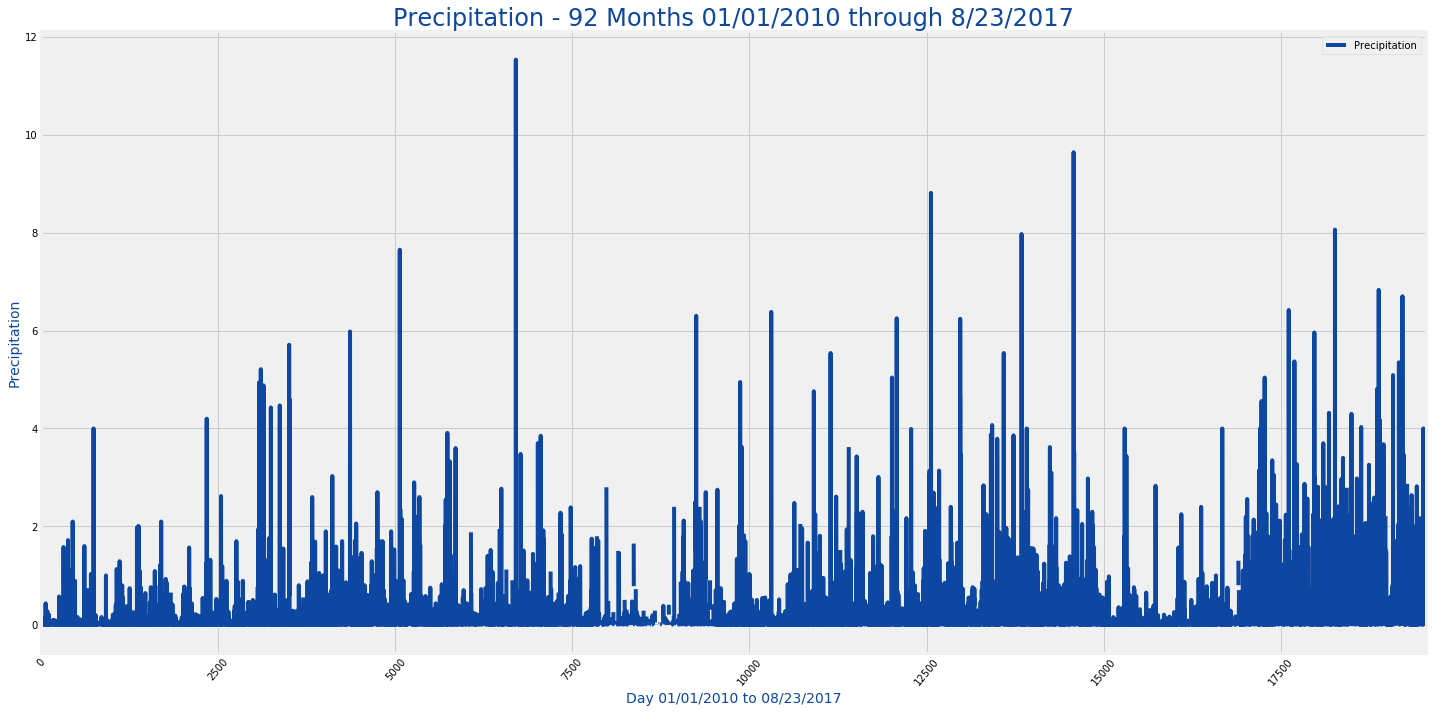

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores_df.plot(rot=50, figsize = (20, 10), color = "#0D47A1")
plt.title("Precipitation - 92 Months 01/01/2010 through 8/23/2017", size =24, color="#0D47A1")
plt.xlabel("Day 01/01/2010 to 08/23/2017",size =14, color="#0D47A1")
plt.ylabel("Precipitation",size =14, color="#0D47A1")
plt.tight_layout()

#Set values for x-axis
plt.tight_layout()
plt.savefig("all_precipitation.png")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_scores_df.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [18]:
# Design a query to show how many stations are available in this dataset?
numer_of_stations = session.query(Station.name).count()
print("There are {} stations in Hawaii".format(numer_of_stations))

There are 9 stations in Hawaii


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_station = session.query( Measurement.station, Station.name, func.count(Measurement.tobs)).\
            filter(Station.station == Measurement.station).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.tobs).desc()).all()
most_active_station


[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [20]:
####### Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_station = session.query( Measurement.station, Station.name, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == "USC00519281").all()
temp_station

[('USC00519281', 'WAIKIKI 717.2, HI US', 54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_temp_obs = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == "USC00519281").filter(Measurement.date >='2016-08-23').all()
#group_by(Measurement.date).all()

year_temp_obs = pd.DataFrame(year_temp_obs, columns= ['Date', 'Observations'])
year_temp_obs

,Date,Observations
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


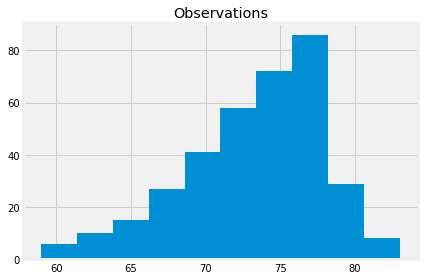

In [22]:
#Plot data from above
temp_plot = year_temp_obs.hist(bins=10)
plt.savefig("temp_obs.png")
plt.tight_layout()

In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2016-08-23', '2017-08-23'))
temp_data = calc_temps('2016-08-23', '2017-08-23')[0]
temp_data


(58.0, 74.59058295964125, 87.0)

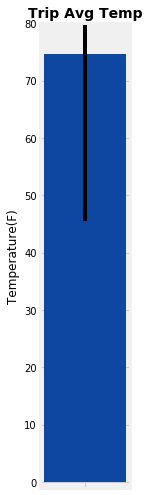

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x = [temp_data[0]]
y = [temp_data[1]]
error = [(temp_data[2] - temp_data[0])]

plt.figure(figsize=(2,7))                                                    
plt.bar(x, y, tick_label='', color="#0D47A1", yerr=error)
plt.ylim(-1, 80)
plt.ylabel("Temperature(F)")
plt.title("Trip Avg Temp", weight="bold", size=14)
plt.savefig("trip_avg.png")
plt.tight_layout()

In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query( Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
            filter(Station.station == Measurement.station, Measurement.date>= '2016-08-23').\
            group_by(Measurement.station).\
            order_by(func.sum(Measurement.prcp).desc()).all()
rainfall
station_rainfall = pd.DataFrame(rainfall, columns=['Station','Name','Latitude','Longitude','Elevation','Rainfall'])
station_rainfall

,Station,Name,Latitude,Longitude,Elevation,Rainfall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,147.81
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,70.03
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,48.51
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,38.01
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,33.24
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,16.09
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,4.59
